## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """        
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %s" % str(batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % (str(batch_size))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)     

50000/50000 [==============================] - 282s 6ms/step - loss: 2.2575 - acc: 0.1593 - val_loss: 2.3942 - val_acc: 0.1698
Epoch 50/50
50000/50000 [==============================] - 281s 6ms/step - loss: 2.2574 - acc: 0.1607 - val_loss: 2.5841 - val_acc: 0.1926
Experiment with BATCH_SIZE = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)  

50000/50000 [==============================] - 39s 776us/step - loss: 1.1167 - acc: 0.6058 - val_loss: 1.4140 - val_acc: 0.5155
Epoch 48/50
50000/50000 [==============================] - 36s 725us/step - loss: 1.1165 - acc: 0.6052 - val_loss: 1.3603 - val_acc: 0.5269
Epoch 49/50
50000/50000 [==============================] - 37s 749us/step - loss: 1.1022 - acc: 0.6107 - val_loss: 1.3597 - val_acc: 0.5294
Epoch 50/50
50000/50000 [==============================] - 40s 798us/step - loss: 1.1109 - acc: 0.6075 - val_loss: 1.3717 - val_acc: 0.5228
Experiment with BATCH_SIZE = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (B

50000/50000 [==============================] - 19s 378us/step - loss: 0.8209 - acc: 0.7053 - val_loss: 1.5447 - val_acc: 0.5098
Epoch 46/50
50000/50000 [==============================] - 19s 372us/step - loss: 0.8177 - acc: 0.7077 - val_loss: 1.5235 - val_acc: 0.5183
Epoch 47/50
50000/50000 [==============================] - 22s 437us/step - loss: 0.8097 - acc: 0.7092 - val_loss: 1.5154 - val_acc: 0.5230
Epoch 48/50
50000/50000 [==============================] - 20s 397us/step - loss: 0.7959 - acc: 0.7164 - val_loss: 1.5766 - val_acc: 0.5072
Epoch 49/50
50000/50000 [==============================] - 19s 370us/step - loss: 0.7933 - acc: 0.7155 - val_loss: 1.6281 - val_acc: 0.4902
Epoch 50/50
50000/50000 [==============================] - 19s 373us/step - loss: 0.8064 - acc: 0.7117 - val_loss: 1.5541 - val_acc: 0.5143
Experiment with BATCH_SIZE = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1

50000/50000 [==============================] - 7s 133us/step - loss: 0.3402 - acc: 0.8819 - val_loss: 2.4468 - val_acc: 0.4546
Epoch 44/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.3267 - acc: 0.8872 - val_loss: 2.3936 - val_acc: 0.4698
Epoch 45/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.3076 - acc: 0.8946 - val_loss: 2.3490 - val_acc: 0.4566
Epoch 46/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.3007 - acc: 0.8972 - val_loss: 2.4999 - val_acc: 0.4613
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.2769 - acc: 0.9068 - val_loss: 2.5465 - val_acc: 0.4568
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.2699 - acc: 0.9082 - val_loss: 2.3948 - val_acc: 0.4557
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.2755 - acc: 0.9064 - val_loss: 2.5813 - val_acc: 0.4361
Epoch 50/50
50000/50000 [==============

Epoch 42/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.2673 - acc: 0.9207 - val_loss: 2.2200 - val_acc: 0.4717
Epoch 43/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.2471 - acc: 0.9275 - val_loss: 2.2508 - val_acc: 0.4743
Epoch 44/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.2405 - acc: 0.9282 - val_loss: 2.3933 - val_acc: 0.4635
Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.2355 - acc: 0.9301 - val_loss: 2.4760 - val_acc: 0.4642
Epoch 46/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.2185 - acc: 0.9372 - val_loss: 2.2577 - val_acc: 0.4748
Epoch 47/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.2039 - acc: 0.9428 - val_loss: 2.4925 - val_acc: 0.4562
Epoch 48/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.1916 - acc: 0.9464 - val_loss: 2.3419 - val_acc: 0.4780
Epoch 49/50
50000/50000 [=======

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
def plot_result(model_result, yupper = 3):
    color_bar = ["r", "g", "b", "y", "m", "k", "c", "orangered", "purple"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(model_result.keys()):
        plt.plot(range(len(model_result[cond]['train-loss'])),model_result[cond]['train-loss'],
                 '-', label=cond, color=color_bar[i])
        plt.plot(range(len(model_result[cond]['valid-loss'])),model_result[cond]['valid-loss'],
                 '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.ylim([0, yupper])
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(model_result.keys()):
        plt.plot(range(len(model_result[cond]['train-acc'])),model_result[cond]['train-acc'],
                 '-', label=cond, color=color_bar[i])
        plt.plot(range(len(model_result[cond]['valid-acc'])),model_result[cond]['valid-acc'],
                 '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

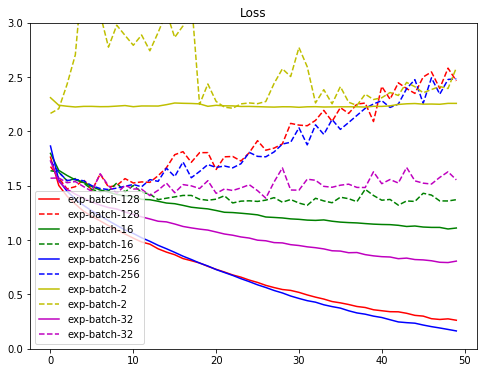

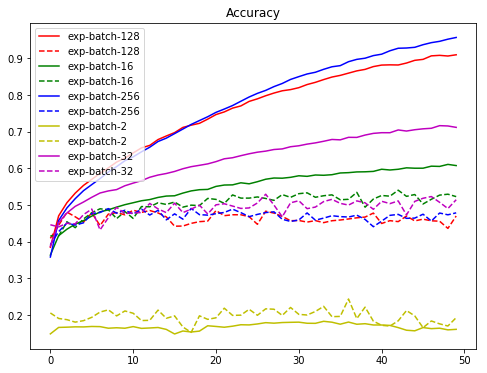

In [11]:
plot_result(results)

# 嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [14]:
BATCH_SIZE = [16, 32, 128, 256]

In [18]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """        
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %s" % str(batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % (str(batch_size))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)    

50000/50000 [==============================] - 35s 704us/step - loss: 0.5133 - acc: 0.8187 - val_loss: 1.8029 - val_acc: 0.5218
Epoch 47/50
50000/50000 [==============================] - 36s 725us/step - loss: 0.5022 - acc: 0.8231 - val_loss: 1.9066 - val_acc: 0.5057
Epoch 48/50
50000/50000 [==============================] - 37s 739us/step - loss: 0.5054 - acc: 0.8216 - val_loss: 1.8006 - val_acc: 0.5258
Epoch 49/50
50000/50000 [==============================] - 37s 740us/step - loss: 0.4932 - acc: 0.8258 - val_loss: 2.0939 - val_acc: 0.4799
Epoch 50/50
50000/50000 [==============================] - 37s 738us/step - loss: 0.4831 - acc: 0.8297 - val_loss: 1.9346 - val_acc: 0.5068
Experiment with BATCH_SIZE = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

50000/50000 [==============================] - 18s 368us/step - loss: 0.2862 - acc: 0.8984 - val_loss: 2.3446 - val_acc: 0.5032
Epoch 42/50
50000/50000 [==============================] - 18s 369us/step - loss: 0.2812 - acc: 0.9000 - val_loss: 2.3685 - val_acc: 0.4948
Epoch 43/50
50000/50000 [==============================] - 17s 346us/step - loss: 0.2705 - acc: 0.9043 - val_loss: 2.2592 - val_acc: 0.5114
Epoch 44/50
50000/50000 [==============================] - 18s 368us/step - loss: 0.2634 - acc: 0.9073 - val_loss: 2.4599 - val_acc: 0.4901
Epoch 45/50
50000/50000 [==============================] - 18s 352us/step - loss: 0.2505 - acc: 0.9124 - val_loss: 2.2599 - val_acc: 0.5121
Epoch 46/50
50000/50000 [==============================] - 18s 358us/step - loss: 0.2475 - acc: 0.9141 - val_loss: 2.5373 - val_acc: 0.4973
Epoch 47/50
50000/50000 [==============================] - 19s 382us/step - loss: 0.2448 - acc: 0.9143 - val_loss: 2.4011 - val_acc: 0.4993
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 7s 137us/step - loss: 0.1062 - acc: 0.9697 - val_loss: 2.7896 - val_acc: 0.4579
Epoch 37/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.0966 - acc: 0.9740 - val_loss: 3.0307 - val_acc: 0.4489
Epoch 38/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 2.9007 - val_acc: 0.4650
Epoch 39/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.0845 - acc: 0.9776 - val_loss: 2.7741 - val_acc: 0.4687
Epoch 40/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.0748 - acc: 0.9808 - val_loss: 2.7403 - val_acc: 0.4806
Epoch 41/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.0717 - acc: 0.9815 - val_loss: 2.8406 - val_acc: 0.4737
Epoch 42/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.0703 - acc: 0.9816 - val_loss: 2.8350 - val_acc: 0.4707
Epoch 43/50
50000/50000 [==============

Epoch 32/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.1605 - acc: 0.9673 - val_loss: 2.2052 - val_acc: 0.4674
Epoch 33/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.1429 - acc: 0.9726 - val_loss: 2.2763 - val_acc: 0.4660
Epoch 34/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.1298 - acc: 0.9761 - val_loss: 2.5623 - val_acc: 0.4505
Epoch 35/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.1166 - acc: 0.9801 - val_loss: 2.2525 - val_acc: 0.4686
Epoch 36/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.1043 - acc: 0.9832 - val_loss: 2.3241 - val_acc: 0.4768
Epoch 37/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.0970 - acc: 0.9849 - val_loss: 2.2964 - val_acc: 0.4810
Epoch 38/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.0868 - acc: 0.9875 - val_loss: 2.4857 - val_acc: 0.4628
Epoch 39/50
50000/50000 [=========

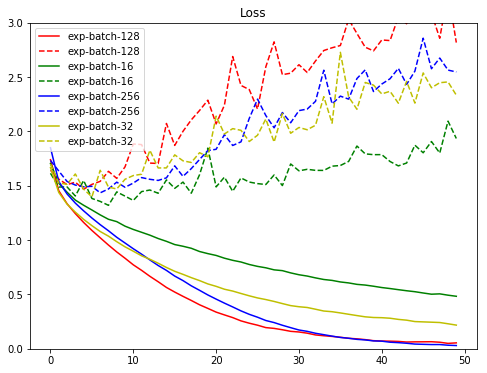

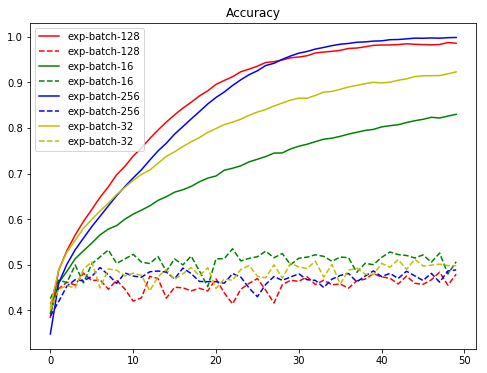

In [21]:
plot_result(results)

# 請於 BN 放在 Input Layer 後，並比較結果

In [22]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """        
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units,
                               activation="relu",
                               name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [23]:
results2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %s" % str(batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % (str(batch_size))
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________

Experiment with BATCH_SIZE = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________

Experiment with BATCH_SIZE = 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_____________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.8857 - acc: 0.3370 - val_loss: 1.6710 - val_acc: 0.4100
Epoch 2/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6018 - acc: 0.4397 - val_loss: 1.5572 - val_acc: 0.4544
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4921 - acc: 0.4802 - val_loss: 1.4960 - val_acc: 0.4745
Epoch 4/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4136 - acc: 0.5098 - val_loss: 1.4561 - val_acc: 0.4870
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.3459 - acc: 0.5323 - val_loss: 1.4290 - val_acc: 0.4942
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2866 - acc: 0.5557 - val_loss: 1.4082 - val_acc: 0.5000
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2312 - acc: 0.5770 - val_loss: 1.3903 - val_ac

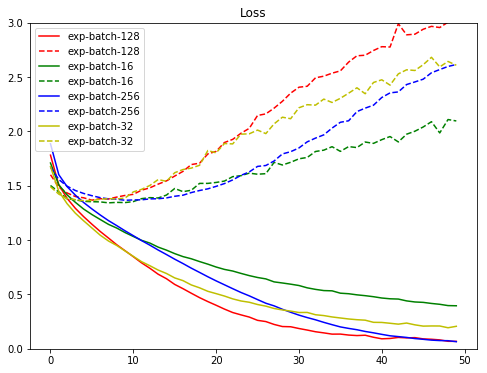

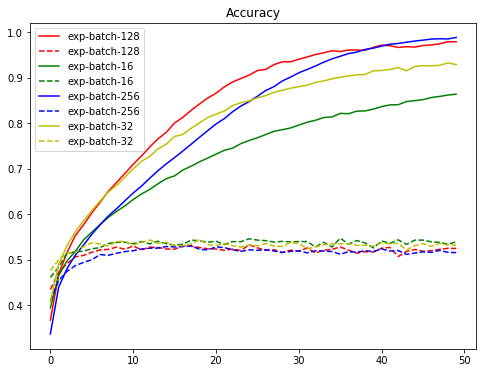

In [24]:
plot_result(results2)